BE WARNED THIS RUNS SLOW

<h1>Toxic Release Inventory (Air)</h1>
https://data.wprdc.org/dataset/toxic-release-inventory
https://data.wprdc.org/dataset/toxic-release-inventory/resource/2750b8c8-246b-430f-b1e0-1aa96e00b013

The information itself has almost dozen metrics, but we're going to choose to use the location, whether or not the release was carcinogenic, and how many millions of pounds were released. I masked, trimmed down the zipcodes to just 5 character ones, and added all of the inputs to a dict by neighborhood. 

In [2]:
import pandas as pd
import fpsnippets
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

#masking
air = pd.read_csv("filtered_tri_air.csv", usecols = ['CITY_NAME','COUNTY_NAME', 'ZIP_CODE', 'CARCINOGEN','REL_EST_AMT'])
pittsburgh = air['CITY_NAME'] == "PITTSBURGH"
air = air[pittsburgh]

#get zips and trim to 5 char zips
air = air[air['ZIP_CODE'].astype(str).str.len() <= 5]
air['ZIP_CODE'] = air['ZIP_CODE'].astype(int)

zips = air['ZIP_CODE'].unique()
zips.sort()
print(zips)

airDict=dict()
for index, row in air.iterrows():
    #get relevant neighborhoods for this row
    zip_code = row['ZIP_CODE']
    neighborhoods = fpsnippets.zip_to_neighborhoods(zip_code)
    
    for i in neighborhoods:
        if i in airDict:
            if row['CARCINOGEN'] == 'Y':
                airDict[i] += int(row['REL_EST_AMT'])
    
        else:
            if row['CARCINOGEN'] == 'Y':
                airDict[i] = int(row['REL_EST_AMT'])
print(airDict)

#sort
sorted_airDict = dict(sorted(airDict.items(), key=lambda item: item[1]))
airDF = pd.Series(sorted_airDict).to_frame()

print(airDF)


[15201 15202 15203 15204 15205 15206 15207 15208 15212 15215 15218 15219
 15220 15224 15225 15226 15233 15236 15238 15239 15275]
{'Garfield': 71582, 'East Liberty': 71582, 'Morningside': 71582, 'Lower Lawrenceville': 71582, 'Polish Hill': 71582, 'Bloomfield': 71582, 'Central Lawrenceville': 71582, 'Stanton Heights': 71582, 'Strip District': 71582, 'Upper Lawrenceville': 71582, 'North Shore': 129315, 'Allegheny West': 129315, 'Manchester': 129315, 'Marshall-Shadeland': 129315, 'Central Northside': 129315, 'Allegheny Center': 129315, 'Brighton Heights': 129315, 'California-Kirkbride': 129315, 'Chateau': 129315, 'Brookline': 6542, 'Beltzhoover': 6542, 'Bon Air': 6542, 'Overbrook': 6542, 'Carrick': 6542, 'Mount Washington': 30917, 'Beechview': 30642, 'Glen Hazel': 5856089, 'Lincoln Place': 5856089, 'Hays': 5856089, 'Greenfield': 5856089, 'New Homestead': 5856089, 'Hazelwood': 5856089, 'South Oakland': 5856089, 'Squirrel Hill South': 5856089, 'Arlington Heights': 275, 'Allentown': 275, 'Sou

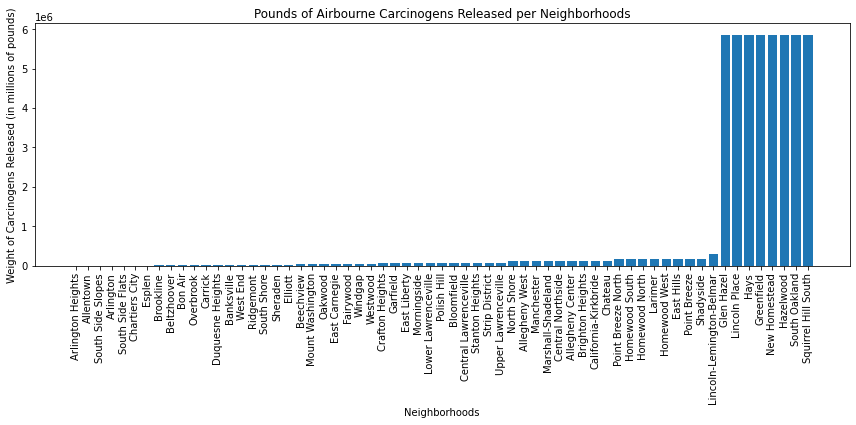

In [3]:
#plot it using matplotlib
plt.figure(figsize=(12, 6)) 
plt.bar(airDF.index, airDF[0])  # Assuming the index represents the x-axis values
plt.xlabel('Neighborhoods')  
plt.ylabel('Weight of Carcinogens Released (in millions of pounds)')  
plt.title('Pounds of Airbourne Carcinogens Released per Neighborhoods') 
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

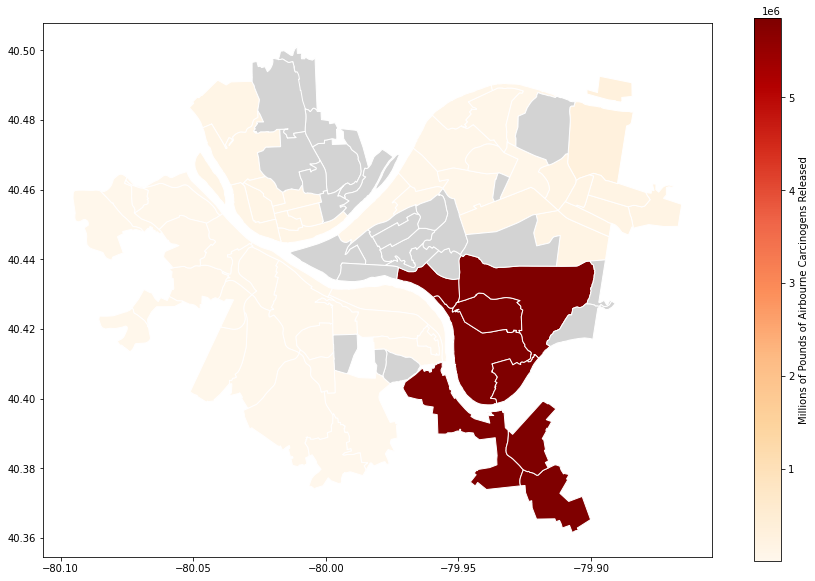

In [4]:
#get shapefiel and merge
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
air_map = neighborhoods.merge(airDF, how='left', left_on='hood', right_index=True)

#better plot
air_map.plot(column= 0, 
               cmap='OrRd',             
               edgecolor="white",        
               legend=True,             
               legend_kwds={'label': "Millions of Pounds of Airbourne Carcinogens Released"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"} 
               )

<h1>Conclusion</h1>

Luckily, it makes a lot of sense for the neighborhoods in a single zipcode to have similar values because air can't exactly be tied to a specific neighborhood. As show by the bar graph and heat map the cleanest air can be found in zip code 15203, which contains the neighborhoods Arlington Heights, Allentown, South Side Slopes, Arlington, South Side Flat, Cartiers City, and Esplen. 